<a href="https://colab.research.google.com/github/feuziq47/DL/blob/master/DL5_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##2019 07 26 금요일 < RNN을 이용한 IMDB 데이터 셋 넥스트 분류 모델 구현 >

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩 ... ')
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in input_train[0]])
print(decoded_review)

데이터 로딩 ... 
25000 훈련 시퀀스
25000 테스트 시퀀스
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praise

In [0]:
print("시퀀스 패딩 (samples * time)")
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)


시퀀스 패딩 (samples * time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Embedding(input_dim=10000,output_dim=32))
model.add(SimpleRNN(units=32))
model.add(Dense(1,activation ='sigmoid'))
model.summary()

W0726 02:05:09.089939 140061918820224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 02:05:09.138123 140061918820224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x=input_train,y=y_train,epochs=10,batch_size=128,validation_split=0.2)


W0726 02:06:39.336424 140061918820224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 969us/sample - loss: 0.6259 - acc: 0.6385 - val_loss: 0.4511 - val_acc: 0.8028
Epoch 2/10
20000/20000 [==============================] - 19s 962us/sample - loss: 0.3924 - acc: 0.8335 - val_loss: 0.4531 - val_acc: 0.7922
Epoch 3/10
20000/20000 [==============================] - 19s 959us/sample - loss: 0.2914 - acc: 0.8834 - val_loss: 0.3490 - val_acc: 0.8622
Epoch 4/10
20000/20000 [==============================] - 19s 969us/sample - loss: 0.2280 - acc: 0.9130 - val_loss: 0.4345 - val_acc: 0.8186
Epoch 5/10
20000/20000 [==============================] - 19s 970us/sample - loss: 0.1741 - acc: 0.9359 - val_loss: 0.3856 - val_acc: 0.8542
Epoch 6/10
20000/20000 [==============================] - 19s 958us/sample - loss: 0.1259 - acc: 0.9551 - val_loss: 0.4770 - val_acc: 0.8076
Epoch 7/10
20000/20000 [==============================] - 19s 967us/sample - loss: 0.0787 - acc: 0.9743 -

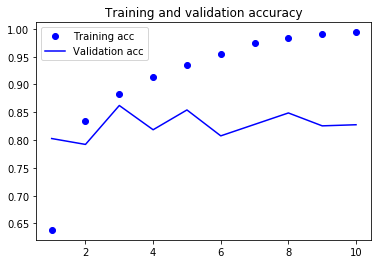

In [0]:
#학습 과정 성능 지표의 시각화
##시각화를 위해 matplot 라이브러리 임포트
import matplotlib.pyplot as plt

#모델 학습 과정의 성능지표가 저장된 history 객체에서 시각화 하고자 하는 정보를 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#추출된 accuracy/ 검증 accu 정보를 plot 객체에 할당
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

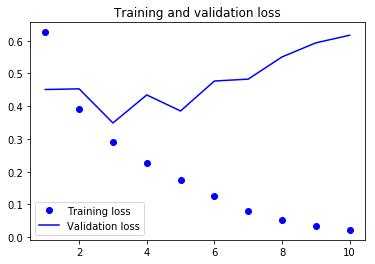

In [0]:
#추출된 loss/ 검증 loss 정보를 plot 객체에 할당후 차트 렌더링 수행
plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
##LSTM 을 이용한 감정분석
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩 ... ')
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

데이터 로딩 ... 
17465344/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스


In [0]:
print("시퀀스 패딩 (samples * time)")
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)

시퀀스 패딩 (samples * time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.layers import Dense
lstm = Sequential()
lstm.add(Embedding(input_dim=10000,output_dim=32))
lstm.add(LSTM(units=32))
lstm.add(Dense(1,activation ='sigmoid'))
lstm.summary()

W0726 02:29:09.310496 139953744705408 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 02:29:09.337883 139953744705408 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
lstm.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = lstm.fit(x=input_train,y=y_train,epochs=10,batch_size=128,validation_split=0.2)

W0726 02:29:09.605914 139953744705408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 120s 6ms/sample - loss: 0.5240 - acc: 0.7528 - val_loss: 0.3409 - val_acc: 0.8702
Epoch 2/10
20000/20000 [==============================] - 118s 6ms/sample - loss: 0.2988 - acc: 0.8832 - val_loss: 0.3421 - val_acc: 0.8758
Epoch 3/10
20000/20000 [==============================] - 117s 6ms/sample - loss: 0.2397 - acc: 0.9089 - val_loss: 0.2772 - val_acc: 0.8868
Epoch 4/10
20000/20000 [==============================] - 112s 6ms/sample - loss: 0.2026 - acc: 0.9269 - val_loss: 0.2853 - val_acc: 0.8830
Epoch 5/10
20000/20000 [==============================] - 111s 6ms/sample - loss: 0.1787 - acc: 0.9348 - val_loss: 0.3234 - val_acc: 0.8588
Epoch 6/10
20000/20000 [==============================] - 111s 6ms/sample - loss: 0.1626 - acc: 0.9417 - val_loss: 0.3101 - val_acc: 0.8682
Epoch 7/10
20000/20000 [==============================] - 111s 6ms/sample - loss: 0.1475 - acc: 0.9477 - val_lo

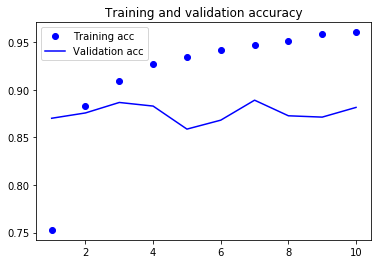

In [0]:
#학습 과정 성능 지표의 시각화
##시각화를 위해 matplot 라이브러리 임포트
import matplotlib.pyplot as plt

#모델 학습 과정의 성능지표가 저장된 history 객체에서 시각화 하고자 하는 정보를 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#추출된 accuracy/ 검증 accu 정보를 plot 객체에 할당
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

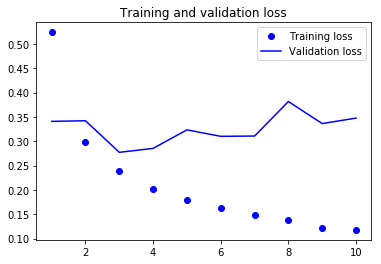

In [0]:
#추출된 loss/ 검증 loss 정보를 plot 객체에 할당후 차트 렌더링 수행
plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
###CudnnLSTM 을 이용하여 감정분석
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩 ... ')
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

print("시퀀스 패딩 (samples * time)")
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)

데이터 로딩 ... 
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples * time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import CuDNNLSTM, Embedding
from tensorflow.keras.layers import Dense
cudnn = Sequential()
cudnn.add(Embedding(input_dim=10000,output_dim=32))
cudnn.add(CuDNNLSTM(units=32))
cudnn.add(Dense(1,activation ='sigmoid'))
cudnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 32)                8448      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,481
Trainable params: 328,481
Non-trainable params: 0
_________________________________________________________________


In [0]:
cudnn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = cudnn.fit(x=input_train,y=y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 340us/sample - loss: 0.5225 - acc: 0.7517 - val_loss: 0.3928 - val_acc: 0.8326
Epoch 2/10
20000/20000 [==============================] - 3s 172us/sample - loss: 0.3278 - acc: 0.8712 - val_loss: 0.3400 - val_acc: 0.8644
Epoch 3/10
20000/20000 [==============================] - 3s 171us/sample - loss: 0.2586 - acc: 0.9020 - val_loss: 0.3612 - val_acc: 0.8428
Epoch 4/10
20000/20000 [==============================] - 3s 172us/sample - loss: 0.2232 - acc: 0.9161 - val_loss: 0.3990 - val_acc: 0.8456
Epoch 5/10
20000/20000 [==============================] - 3s 171us/sample - loss: 0.1949 - acc: 0.9272 - val_loss: 0.2919 - val_acc: 0.8848
Epoch 6/10
20000/20000 [==============================] - 3s 171us/sample - loss: 0.1743 - acc: 0.9369 - val_loss: 0.3725 - val_acc: 0.8764
Epoch 7/10
20000/20000 [==============================] - 3s 173us/sample - loss: 0.1564 - acc: 0.9452 - val_lo

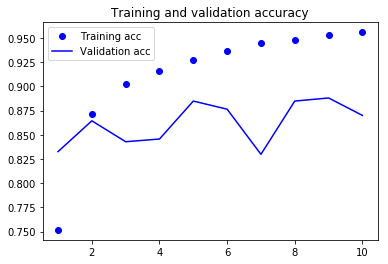

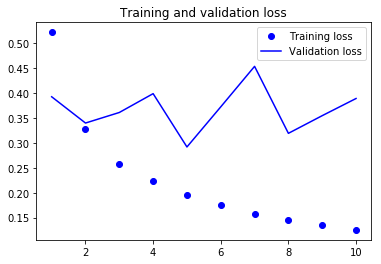

In [0]:
#학습 과정 성능 지표의 시각화
##시각화를 위해 matplot 라이브러리 임포트
import matplotlib.pyplot as plt

#모델 학습 과정의 성능지표가 저장된 history 객체에서 시각화 하고자 하는 정보를 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#추출된 accuracy/ 검증 accu 정보를 plot 객체에 할당
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

#추출된 loss/ 검증 loss 정보를 plot 객체에 할당후 차트 렌더링 수행
plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 로딩 ... 
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples * time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, None, 32)          8448      
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 16)                3200      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 331,665
Trainable params: 331,665
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 367us/sample -

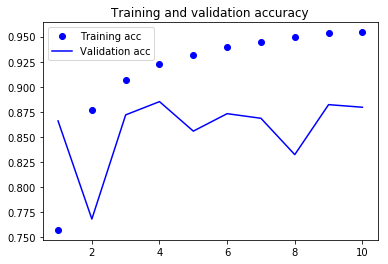

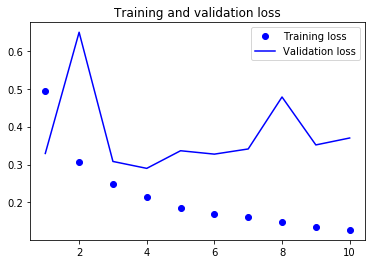

In [0]:
###CudnnLSTM + layer 1 개 추가하여 감정분석
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩 ... ')
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

print("시퀀스 패딩 (samples * time)")
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import CuDNNLSTM, Embedding
from tensorflow.keras.layers import Dense

###
#######
#여기서 hidden layer 한 층 더 추가하기
###### RNN 계열은 OUTPUT (연산결과)를 찍어내지 않기때문에, 파라미터를 지정해서 명령어를 입력해줘야한다

cudnn = Sequential()
cudnn.add(Embedding(input_dim=10000,output_dim=32))
cudnn.add(CuDNNLSTM(units=32,return_sequences=True))  #return_sequences=True 를 추가해준다
cudnn.add(CuDNNLSTM(units=16))                          #
cudnn.add(Dense(1,activation ='sigmoid'))


cudnn.summary()

cudnn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = cudnn.fit(x=input_train,y=y_train,epochs=10,batch_size=128,validation_split=0.2)

#학습 과정 성능 지표의 시각화
##시각화를 위해 matplot 라이브러리 임포트
import matplotlib.pyplot as plt

#모델 학습 과정의 성능지표가 저장된 history 객체에서 시각화 하고자 하는 정보를 추출
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#추출된 accuracy/ 검증 accu 정보를 plot 객체에 할당
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

#추출된 loss/ 검증 loss 정보를 plot 객체에 할당후 차트 렌더링 수행
plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()